In [1]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import numpy as np
import keras
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
from keras.utils.vis_utils import plot_model

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
# dataframe = read_csv('w_d_v.csv', usecols=[7], engine='python', skipfooter=3)
dataframe = read_csv('00.txt', usecols=[0], engine='python',skiprows=-1)
all_data = read_csv('all_data.csv', usecols=[7], engine='python', skipfooter=3)
dataset = dataframe.values
allData=all_data.values

In [4]:
look_back = 3
trainX, trainY = create_dataset(dataset, look_back)
AllX, AllY = create_dataset(allData, look_back)
trainY=numpy.reshape(trainY,(trainY.shape[0],-1))
AllY=numpy.reshape(AllY,(AllY.shape[0],-1))

In [5]:
encX = OneHotEncoder()
encX.fit(AllX)
encY = OneHotEncoder()
encY.fit(AllY)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [6]:
trainX_one=encX.transform(trainX).toarray()
train_X=numpy.reshape(trainX_one,(trainX_one.shape[0],look_back,-1))
train_Y=encY.transform(trainY).toarray()

In [7]:
a_train, a_test, b_train, b_test = train_test_split(train_X, train_Y, test_size=0.1, random_state=42)

In [64]:
train_X.shape

(252, 3, 200)

In [65]:
from keras.layers import Input, Embedding, LSTM, Dense,Merge
from keras.models import Model

input_pattern = Input(shape=(3, a_train.shape[2]),name="input_pattern")

lstm_out = LSTM(512,return_sequences=True,input_shape=(3, a_train.shape[2]))(input_pattern)
lstm_out = LSTM(300)(lstm_out)
lstm_out = Dropout(0.2)(lstm_out)

x=Dense(250,activation='relu',name="C")(lstm_out)
x=Dropout(0.2)(x)
x=Dense(a_train.shape[2],activation='softmax')(x)


model = Model(inputs=input_pattern, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print(model.summary()) # Summarize Model
plot_model(model, to_file='t_lstm_test.png',show_shapes=True)
history1 = model.fit(a_train, b_train, epochs=100, batch_size=16, verbose=2, validation_data=(a_test, b_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_pattern (InputLayer)   (None, 3, 200)            0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 3, 512)            1460224   
_________________________________________________________________
lstm_19 (LSTM)               (None, 300)               975600    
_________________________________________________________________
dropout_19 (Dropout)         (None, 300)               0         
_________________________________________________________________
C (Dense)                    (None, 250)               75250     
_________________________________________________________________
dropout_20 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               50200     
Total para

 - 1s - loss: 0.6370 - acc: 0.7434 - val_loss: 5.0973 - val_acc: 0.2692
Epoch 83/100
 - 1s - loss: 0.6134 - acc: 0.7611 - val_loss: 4.9426 - val_acc: 0.3077
Epoch 84/100
 - 1s - loss: 0.6435 - acc: 0.7743 - val_loss: 4.9844 - val_acc: 0.2308
Epoch 85/100
 - 1s - loss: 0.6414 - acc: 0.7743 - val_loss: 5.1252 - val_acc: 0.1923
Epoch 86/100
 - 1s - loss: 0.6506 - acc: 0.7566 - val_loss: 5.0935 - val_acc: 0.2692
Epoch 87/100
 - 1s - loss: 0.6321 - acc: 0.7522 - val_loss: 5.1990 - val_acc: 0.2692
Epoch 88/100
 - 1s - loss: 0.5652 - acc: 0.7920 - val_loss: 5.1889 - val_acc: 0.2692
Epoch 89/100
 - 1s - loss: 0.6190 - acc: 0.7788 - val_loss: 5.0577 - val_acc: 0.2308
Epoch 90/100
 - 1s - loss: 0.6432 - acc: 0.7478 - val_loss: 4.9473 - val_acc: 0.3077
Epoch 91/100
 - 1s - loss: 0.6418 - acc: 0.7743 - val_loss: 5.0288 - val_acc: 0.3462
Epoch 92/100
 - 1s - loss: 0.6918 - acc: 0.7522 - val_loss: 4.8906 - val_acc: 0.2308
Epoch 93/100
 - 1s - loss: 0.6627 - acc: 0.7522 - val_loss: 4.6607 - val_acc: 

In [61]:
from keras.layers import Input, Embedding, LSTM, Dense,Merge
from keras.models import Model

input_pattern = Input(shape=(3, a_train.shape[2]),name="input_pattern")

lstm_out = LSTM(512,input_shape=(3, a_train.shape[2]))(input_pattern)
# lstm_out = LSTM(512,return_sequences=True,input_shape=(3, a_train.shape[2]))(input_pattern)
# lstm_out = LSTM(300)(lstm_out)
lstm_out = Dropout(0.2)(lstm_out)

x=Dense(250,activation='relu',name="C")(lstm_out)
x=Dropout(0.2)(x)
x=Dense(a_train.shape[2],activation='softmax')(x)


model = Model(inputs=input_pattern, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print(model.summary()) # Summarize Model
plot_model(model, to_file='t_lstm_test.png',show_shapes=True)
history = model.fit(a_train, b_train, epochs=100, batch_size=16, verbose=2, validation_data=(a_test, b_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_pattern (InputLayer)   (None, 3, 200)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 512)               1460224   
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
C (Dense)                    (None, 250)               128250    
_________________________________________________________________
dropout_18 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               50200     
Total params: 1,638,674
Trainable params: 1,638,674
Non-trainable params: 0
_________________________________________________________________


Epoch 84/100
 - 1s - loss: 0.6183 - acc: 0.7434 - val_loss: 5.1124 - val_acc: 0.1923
Epoch 85/100
 - 1s - loss: 0.5994 - acc: 0.7788 - val_loss: 5.1382 - val_acc: 0.2692
Epoch 86/100
 - 1s - loss: 0.6305 - acc: 0.7434 - val_loss: 5.0336 - val_acc: 0.1923
Epoch 87/100
 - 1s - loss: 0.6449 - acc: 0.7434 - val_loss: 4.6759 - val_acc: 0.2692
Epoch 88/100
 - 1s - loss: 0.6332 - acc: 0.7434 - val_loss: 4.8470 - val_acc: 0.3077
Epoch 89/100
 - 1s - loss: 0.6224 - acc: 0.7699 - val_loss: 5.0224 - val_acc: 0.3077
Epoch 90/100
 - 1s - loss: 0.6585 - acc: 0.7389 - val_loss: 4.8944 - val_acc: 0.2692
Epoch 91/100
 - 1s - loss: 0.5822 - acc: 0.7832 - val_loss: 4.6571 - val_acc: 0.2692
Epoch 92/100
 - 1s - loss: 0.6341 - acc: 0.7522 - val_loss: 4.7465 - val_acc: 0.2308
Epoch 93/100
 - 1s - loss: 0.6408 - acc: 0.7699 - val_loss: 4.8180 - val_acc: 0.2692
Epoch 94/100
 - 1s - loss: 0.6122 - acc: 0.7611 - val_loss: 4.9027 - val_acc: 0.2692
Epoch 95/100
 - 1s - loss: 0.5579 - acc: 0.7876 - val_loss: 5.032

In [11]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


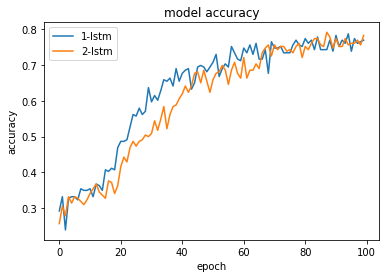

In [68]:
fig = plt.figure()
plt.plot(history.history['acc'])
plt.plot(history1.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['1-lstm', '2-lstm'], loc='upper left')

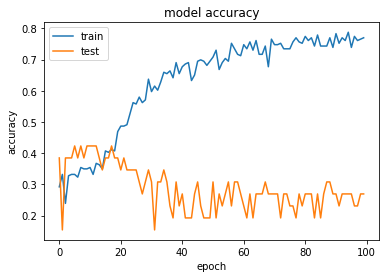

In [67]:
fig = plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

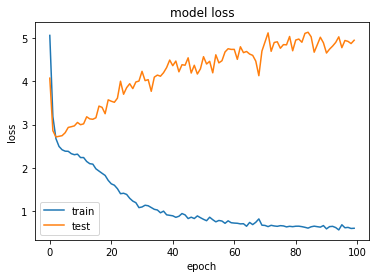

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')

In [75]:
train_X=train_X.reshape(-1,200)
train_Y.reshape(-1,200)
train_X.shape

(756, 200)

In [76]:
train_Y.shape

(252, 200)

In [48]:
from keras.layers import Input, Embedding, LSTM, Dense,Merge
from keras.models import Model

input_pattern = Input(shape=(3, a_train.shape[2]),name="input_pattern")
input_id = Input(shape=(1,),name="input_id")

lstm_out = LSTM(512,return_sequences=True,input_shape=(3, a_train.shape[2]))(input_pattern)
lstm_out = LSTM(300)(lstm_out)
lstm_out = Dropout(0.2)(lstm_out)

x = keras.layers.concatenate([lstm_out, input_id])
x=Dense(250,activation='relu',name="C")(x)
x=Dropout(0.2)(x)
x=Dense(a_train.shape[2],activation='softmax',name='x')(x)


model = Model(inputs=[input_pattern,input_id], outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print(model.summary()) # Summarize Model
plot_model(model, to_file='t_lstm.png',show_shapes=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_pattern (InputLayer)      (None, 3, 200)       0                                            
__________________________________________________________________________________________________
lstm_15 (LSTM)                  (None, 3, 512)       1460224     input_pattern[0][0]              
__________________________________________________________________________________________________
lstm_16 (LSTM)                  (None, 300)          975600      lstm_15[0][0]                    
__________________________________________________________________________________________________
dropout_15 (Dropout)            (None, 300)          0           lstm_16[0][0]                    
__________________________________________________________________________________________________
input_id (

In [55]:
k=np.zeros(a_train.shape[0],dtype=np.int16)
k=k.reshape(-1,1)

k1=np.zeros(train_X.shape[0],dtype=np.int16)
k1=k1.reshape(-1,1)

In [56]:
history = model.fit({'input_pattern': a_train, 'input_id' : k}, {'x': b_train}, epochs=100, batch_size=2, verbose=2, validation_data=([train_X,k1], train_Y))

Train on 226 samples, validate on 252 samples
Epoch 1/100
 - 8s - loss: 2.7436 - acc: 0.3097 - val_loss: 2.6074 - val_acc: 0.3413
Epoch 2/100
 - 8s - loss: 2.5973 - acc: 0.3186 - val_loss: 2.4487 - val_acc: 0.3413
Epoch 3/100
 - 8s - loss: 2.4820 - acc: 0.3319 - val_loss: 2.4168 - val_acc: 0.3413
Epoch 4/100
 - 8s - loss: 2.3841 - acc: 0.3230 - val_loss: 2.3499 - val_acc: 0.2937
Epoch 5/100
 - 8s - loss: 2.3489 - acc: 0.3363 - val_loss: 2.3098 - val_acc: 0.3889
Epoch 6/100
 - 8s - loss: 2.3288 - acc: 0.3142 - val_loss: 2.2883 - val_acc: 0.3611
Epoch 7/100
 - 8s - loss: 2.1562 - acc: 0.3186 - val_loss: 2.0584 - val_acc: 0.4087
Epoch 8/100
 - 8s - loss: 2.0779 - acc: 0.3628 - val_loss: 1.9269 - val_acc: 0.4286
Epoch 9/100
 - 8s - loss: 2.0270 - acc: 0.3982 - val_loss: 2.0207 - val_acc: 0.4286
Epoch 10/100
 - 8s - loss: 1.9169 - acc: 0.4115 - val_loss: 1.8916 - val_acc: 0.4643
Epoch 11/100
 - 8s - loss: 1.8241 - acc: 0.4513 - val_loss: 1.7367 - val_acc: 0.5000
Epoch 12/100
 - 8s - loss: 1

Epoch 97/100
 - 8s - loss: 0.6230 - acc: 0.7522 - val_loss: 1.0175 - val_acc: 0.7421
Epoch 98/100
 - 8s - loss: 0.6140 - acc: 0.7743 - val_loss: 1.0327 - val_acc: 0.7341
Epoch 99/100
 - 8s - loss: 0.6207 - acc: 0.7743 - val_loss: 1.0398 - val_acc: 0.7381
Epoch 100/100
 - 8s - loss: 0.6217 - acc: 0.7522 - val_loss: 1.0455 - val_acc: 0.7341


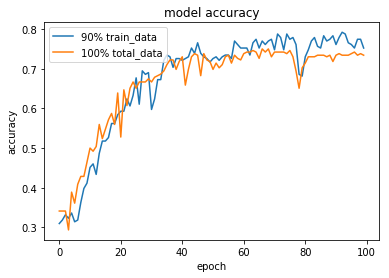

In [60]:
fig = plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['90% train_data', '100% total_data'], loc='upper left')

model.fit(a_train, b_train, epochs=100, batch_size=16, verbose=2, validation_data=(a_test, b_test))

In [ ]:
model.evaluate(train_X, train_Y, batch_size=64, verbose=2, sample_weight=None)

In [ ]:
trainPredict = model.predict(train_X)
D=np.argmax(train_Y,axis = 1)
E=np.argmax(trainPredict,axis = 1)

In [ ]:
print(D)
print(E)

In [ ]:
A=0 #total number of right
for i,t in enumerate(E):
    if D[i]==t :
        A=A+1
print(A/D.shape[0])